In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np # linear algebra

In [2]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [3]:
data = arff.loadarff(r"dataset/EEG Eye State.arff")
df = pd.DataFrame(data[0])
print(df)

           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8    

## Cleaning

In [4]:
#в оригинальной статье образцы [899, 10387, 11510, 13180] были обнаружены как выбросы в наборе данных 
df.iloc[[898,899,900,10386,10387,10388,11509,11510,11511,13179,13180,13181]]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
898,7222.05,3797.95,1040.00,3733.85,6040.51,362564.00,6350.26,5361.54,1357.95,6215.38,3273.33,3091.28,276.4100,715897.00,b'0'
899,4253.85,4005.13,4246.15,4134.36,4349.74,4630.77,4106.67,4597.44,4195.38,4208.72,4177.44,4261.03,4556.4100,4302.56,b'0'
900,4254.36,4003.08,4246.15,4135.38,4347.69,4627.18,4104.10,4588.72,4188.72,4206.67,4173.33,4260.51,4554.3600,4303.59,b'0'
10386,7398.46,2830.77,2457.44,642564.00,6474.36,8092.31,567179.00,5087.69,7143.59,1816.41,6137.95,6904.62,3504.1000,121026.00,b'0'
10387,4291.79,3959.49,4251.79,4110.26,4339.49,4628.72,4056.41,4616.41,4213.33,4234.36,4208.72,4274.87,4607.1800,4358.46,b'0'
10388,4292.31,3958.97,4249.74,4116.41,4338.97,4630.77,4056.41,4614.87,4219.49,4240.00,4210.26,4274.36,4607.1800,4356.92,b'0'
11509,309231.00,5500.51,6880.51,5416.41,5454.87,4002.05,2086.15,4770.26,265641.00,3914.87,6823.08,2257.95,152308.0000,5022.56,b'1'
11510,4269.74,3991.28,4260.51,4107.69,4339.49,4620.00,4080.00,4611.79,4200.51,4221.03,4203.08,4267.18,4586.1500,4347.69,b'1'
11511,4268.72,3987.69,4258.97,4106.15,4336.41,4620.00,4086.15,4620.00,4207.18,4223.08,4202.56,4267.69,4585.6400,4348.72,b'1'
13179,1030.77,7804.62,5762.56,2453.33,2089.74,2768.21,3581.54,7264.10,4586.15,6674.36,5170.77,7002.56,86.6667,1366.15,b'0'


In [4]:
index_del = [898, 10386, 11509, 13179]
df = df.drop(labels=index_del, axis=0)

In [5]:
y_ = np.array(df.iloc[:,-1])
data_y = []
for i in y_:
    if i==b'0':
        i = 0
    else:
        i=1
    data_y.append(i)
data_y = np.array(data_y)

In [6]:
data_x = np.array(df.iloc[:,:-1])

In [7]:

# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(11980, 14) (11980,) (2996, 14) (2996,)


## Normalization 
(All data - mean)/standart deviation 

In [8]:
# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

train_x_norm = minmax_scaler(train_x)
print(train_x_norm)

[[0.07202352 0.24080707 0.16029887 ... 0.24869832 0.25399515 0.20362262]
 [0.36015025 0.38367558 0.33151396 ... 0.39004594 0.45454782 0.42677255]
 [0.30821493 0.41224928 0.35599597 ... 0.40837162 0.40240882 0.37656722]
 ...
 [0.43047526 0.32246896 0.45652059 ... 0.50260337 0.47725436 0.49373113]
 [0.22779683 0.47552531 0.30432939 ... 0.34818785 0.2780573  0.29149555]
 [0.22446513 0.29389526 0.16845954 ... 0.24083716 0.34891421 0.32636188]]


#### Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 
Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных[⇨] или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [63]:
from sklearn.decomposition import PCA
n_components = 14
pca_eeg = PCA(n_components)
principalComponents_eeg = pca_eeg.fit_transform(train_x_norm)

In [64]:
principal_eeg_Df = pd.DataFrame(data = 10.*principalComponents_eeg
             , columns = ['principal component '+str(i+1) for i in range(n_components)])
                         

In [65]:
principal_eeg_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14
11975,0.021086,1.606994,0.246041,0.231315,-0.826369,-0.654210,-0.725955,0.485240,-0.123687,0.023047,-0.441982,-0.132641,-0.155027,-0.044399
11976,0.477832,1.309220,-0.739946,-1.034582,-0.036481,-0.578300,0.971735,-0.154734,-0.286039,0.061272,0.075850,0.058277,-0.011067,0.215343
11977,1.482241,0.539497,1.422691,0.710516,0.501327,-1.119124,-0.107350,0.080305,-0.644004,0.295517,-0.367839,-0.014621,-0.075847,-0.193826
11978,-0.703691,-1.640077,-2.403193,2.079428,0.575404,0.257736,0.488643,0.538281,-0.722311,0.007003,0.166191,-0.446533,-0.076868,0.056829
11979,-3.491530,-0.898498,0.348974,0.210136,-0.173875,0.274433,0.375241,-0.081729,0.401349,-0.812547,-0.251703,-0.298948,0.378757,-0.068334


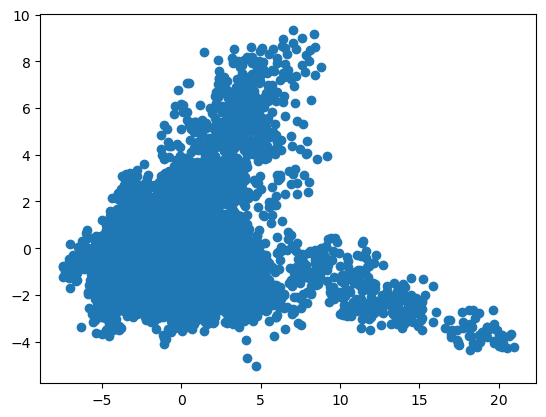

In [75]:
# plot
fig, ax = plt.subplots()

ax.scatter(principal_eeg_Df.iloc[:,0], principal_eeg_Df.iloc[:,1])
plt.show()

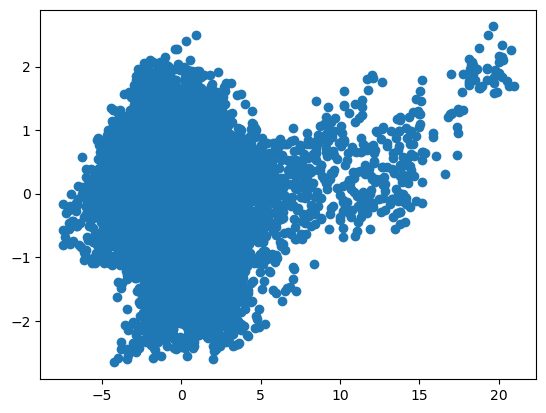

In [76]:
# plot
fig, ax = plt.subplots()

ax.scatter(principal_eeg_Df.iloc[:,0], -1*principal_eeg_Df.iloc[:,3])
plt.show()

In [143]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array(df.iloc[:,:14]).T#data_matrix
pca = PCA(n_components=14)
pca.fit(X)
PCX = pca.components_

In [13]:
# Helper functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [14]:
# hyperparameters
num_rows = 2
num_cols = 4
som_shape = (num_rows, num_cols)
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [15]:
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [19]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)
win_cor = []

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
  win_cor.append([winner[0],winner[1]])
  

sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000
sample data:  10000
sample data:  11000


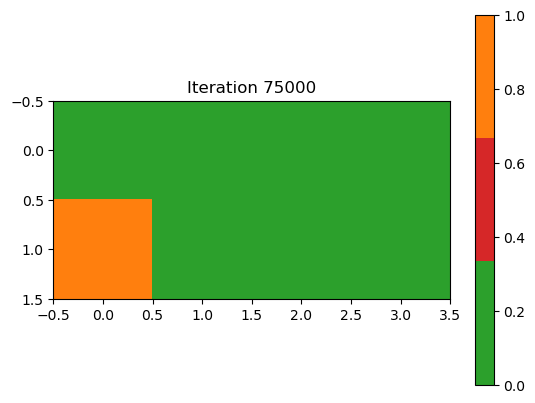

In [17]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

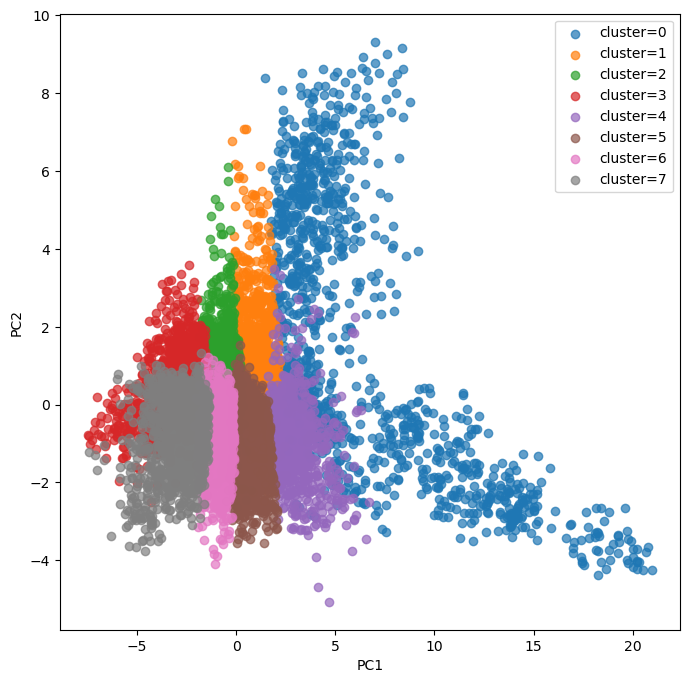

In [20]:
# each neuron represents a cluster
winner_coordinates = np.array(win_cor).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(8,8))

for c in np.unique(cluster_index):
    plt.scatter(principal_eeg_Df.iloc[cluster_index == c, 0],
                principal_eeg_Df.iloc[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)

# Plotting centroids
#for centroid in som.get_weights():
    #plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                #s=7, linewidths=20, color='k') # label='centroid'
    
#plt.title("Clusters of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

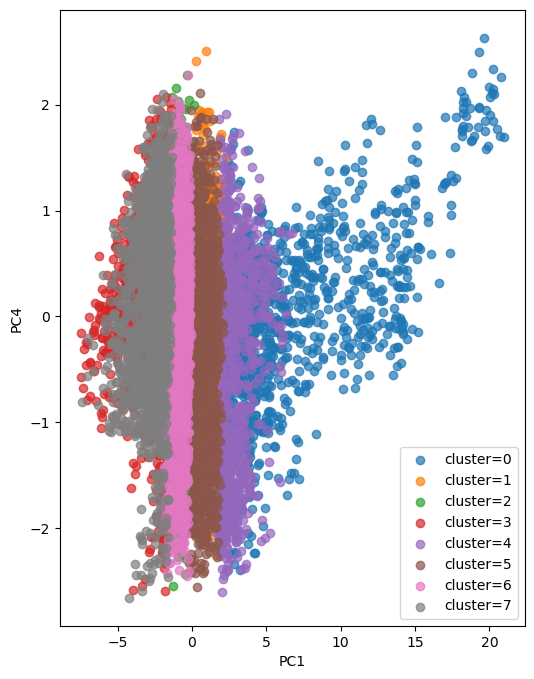

In [79]:
# each neuron represents a cluster
winner_coordinates = np.array(win_cor).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(6,8))

for c in np.unique(cluster_index):
    plt.scatter(principal_eeg_Df.iloc[cluster_index == c, 0],
                -1*principal_eeg_Df.iloc[cluster_index == c, 3], label='cluster='+str(c), alpha=0.7)

# Plotting centroids
#for centroid in som.get_weights():
    #plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                #s=7, linewidths=20, color='k') # label='centroid'
    
#plt.title("Clusters of Customers")
plt.xlabel("PC1")
plt.ylabel("PC4")
plt.legend()

In [70]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.5767690253671562


# Train SOM

In [28]:
from minisom import MiniSom
import matplotlib.pyplot as plt
%matplotlib inline

data = train_x_norm#np.array(principal_eeg_Df)#100.*train_x_norm

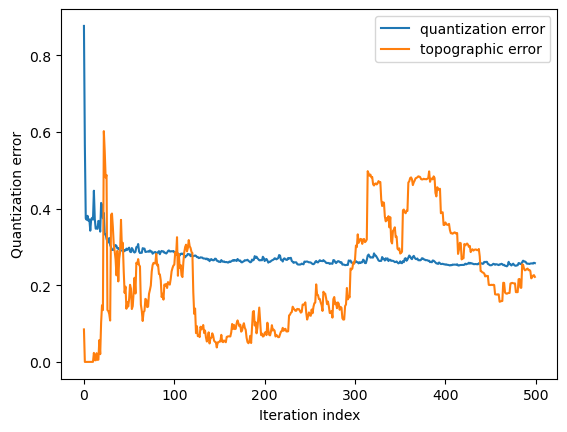

In [66]:
# I use linear som topography
som_shape = (2, 4)

som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

max_iter = 500
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

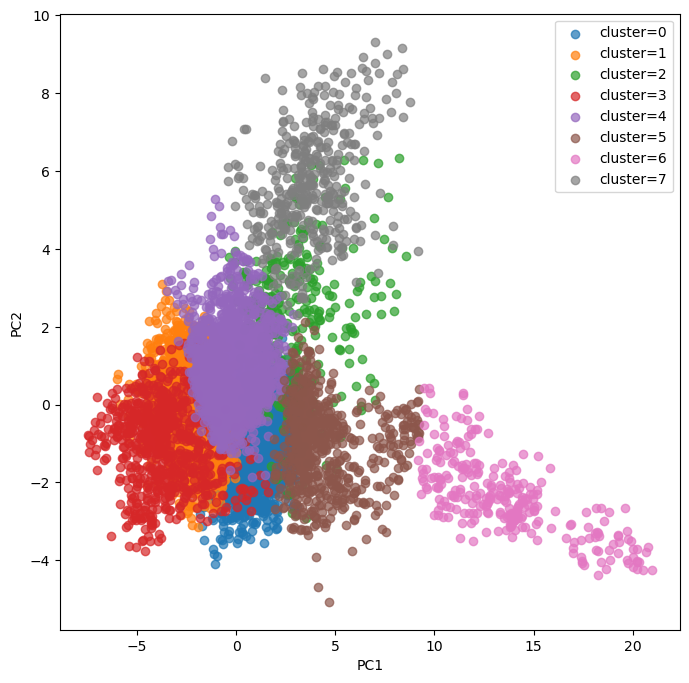

In [65]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

# Plotting the clusters 
plt.figure(figsize=(8,8))

for c in np.unique(cluster_index):
    plt.scatter(principal_eeg_Df.iloc[cluster_index == c, 0],
                principal_eeg_Df.iloc[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)

# Plotting centroids
#for centroid in som.get_weights():
    #plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                #s=7, linewidths=20, color='k') # label='centroid'
    
#plt.title("Clusters of Customers")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()